## NBA Prediction Model Project

### Importing Modules

In [32]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Loading dataset
ncaa = pd.read_csv('ncaa_data.csv')
ncaa.head()

,Player,Season,Team,GP,GS,MP,FG,FGA,2P,2PA,...,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,POS,Class,Drafted
0,James Bouknight,2020-21,Connecticut,15,14,475,98,219,76,144,...,281,0.447,0.528,0.293,0.778,0.546,0.498,G,SO,1
1,Caris LeVert,2015-16,Michigan,15,14,464,82,162,53,97,...,247,0.506,0.546,0.446,0.794,0.636,0.596,G,SR,1
2,B.J. Taylor,2017-18,UCF,16,14,495,80,201,54,134,...,254,0.398,0.403,0.388,0.673,0.510,0.463,G,JR,0
3,Emanuel Miller,2020-21,Texas A&M,17,13,538,100,175,100,169,...,276,0.571,0.592,0.000,0.817,0.630,0.571,F,SO,0
4,Dylan Disu,2020-21,Vanderbilt,17,17,537,89,181,65,116,...,255,0.492,0.560,0.369,0.736,0.592,0.558,F,SO,0


In [65]:
# See all columns and their data types
ncaa.columns = ncaa.columns.str.strip()
ncaa.info()

<class 'pandas.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   3293 non-null   str    
 1   Season   3293 non-null   str    
 2   Team     3293 non-null   str    
 3   GP       3293 non-null   int64  
 4   GS       3293 non-null   int64  
 5   MP       3293 non-null   int64  
 6   FG       3293 non-null   int64  
 7   FGA      3293 non-null   int64  
 8   2P       3293 non-null   int64  
 9   2PA      3293 non-null   int64  
 10  3P       3293 non-null   int64  
 11  3PA      3293 non-null   int64  
 12  FT       3293 non-null   int64  
 13  FTA      3293 non-null   int64  
 14  ORB      3293 non-null   int64  
 15  DRB      3293 non-null   int64  
 16  TRB      3293 non-null   int64  
 17  AST      3293 non-null   int64  
 18  STL      3293 non-null   int64  
 19  BLK      3293 non-null   int64  
 20  TOV      3293 non-null   int64  
 21  PF       3293 non-null   

In [22]:
# Statistic summary of the dataset
ncaa.describe()

,GP,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,TS%,eFG%,Drafted
count,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,...,3293.000000,3293.000000,3293.000000,3293.000000,3293.000000,3126.000000,3293.000000,3293.000000,3293.000000,3293.000000
mean,32.754327,27.775585,947.320377,139.908898,307.375949,99.655937,195.725478,40.252961,111.650471,77.764045,...,56.978743,70.353173,397.834801,0.459016,0.503231,0.338594,0.744838,0.558046,0.523156,0.098694
std,3.680110,9.000728,175.089721,40.279833,84.888148,43.558933,75.218870,27.090933,69.285879,35.682581,...,20.045229,18.366032,113.730216,0.068783,0.070751,0.102225,0.088795,0.048224,0.055262,0.298296
min,15.000000,0.000000,464.000000,72.000000,140.000000,9.000000,29.000000,0.000000,0.000000,11.000000,...,12.000000,18.000000,246.000000,0.305000,0.238000,0.000000,0.352000,0.408000,0.340000,0.000000
25%,31.000000,24.000000,817.000000,108.000000,242.000000,68.000000,141.000000,19.000000,60.000000,52.000000,...,42.000000,58.000000,305.000000,0.410000,0.455000,0.310000,0.689000,0.524000,0.484000,0.000000
50%,33.000000,31.000000,955.000000,133.000000,294.000000,94.000000,186.000000,40.000000,114.000000,71.000000,...,55.000000,70.000000,378.000000,0.445000,0.498000,0.352000,0.753000,0.555000,0.518000,0.000000
75%,35.000000,34.000000,1075.000000,164.000000,361.000000,125.000000,239.000000,58.000000,159.000000,96.000000,...,70.000000,83.000000,466.000000,0.494000,0.549000,0.389000,0.810000,0.589000,0.557000,0.000000
max,41.000000,41.000000,1474.000000,336.000000,703.000000,335.000000,537.000000,147.000000,380.000000,310.000000,...,167.000000,141.000000,983.000000,0.770000,0.770000,1.000000,0.984000,0.739000,0.770000,1.000000


In [ ]:
# Check for missing values
ncaa.isnull().sum()

In [24]:
# Select specific columns
scoring = ncaa[['Player', 'Team', 'PTS', 'GP']]
scoring.head()

,Player,Team,PTS,GP
0,James Bouknight,Connecticut,281,15
1,Caris LeVert,Michigan,247,15
2,B.J. Taylor,UCF,254,16
3,Emanuel Miller,Texas A&M,276,17
4,Dylan Disu,Vanderbilt,255,17


In [25]:
# Filter high scorers (more than 500 points)
high_scorers = ncaa[ncaa['PTS'] > 500]
print(f"High scorers: {len(high_scorers)}")

# Multiple conditions: Guards with 400+ points
# Use & for AND, | for OR, wrap each condition in parentheses
elite_guards = ncaa[(ncaa['POS'] == 'G') & (ncaa['PTS'] >= 400)]
elite_guards[['Player', 'PTS', 'POS']].head()

High scorers: 611


,Player,PTS,POS
41,Scotty Pippen Jr.,457,G
82,Remy Martin,440,G
88,Josh Okogie,437,G
98,Javon Freeman-Liberty,520,G
102,Nah'Shon Hyland,467,G


In [26]:
# Points per game
ncaa['PPG'] = ncaa['PTS'] / ncaa['GP']

# Rebounds and assists per game
ncaa['RPG'] = ncaa['TRB'] / ncaa['GP']
ncaa['APG'] = ncaa['AST'] / ncaa['GP']

ncaa[['Player', 'PPG', 'RPG', 'APG']].head()

,Player,PPG,RPG,APG
0,James Bouknight,18.733333,5.666667,1.800000
1,Caris LeVert,16.466667,5.333333,4.933333
2,B.J. Taylor,15.875000,2.000000,3.187500
3,Emanuel Miller,16.235294,8.235294,1.411765
4,Dylan Disu,15.000000,9.235294,1.352941


In [27]:
# Average stats by position
ncaa.groupby('POS')[['PTS', 'AST', 'TRB']].mean()

,PTS,AST,TRB
POS,,,
C,394.638158,35.414474,235.907895
F,391.194542,47.459507,204.239437
G,401.839401,91.456858,119.769077


In [28]:
# How many players per position?
ncaa['POS'].value_counts()

# Draft rate by position
ncaa.groupby('POS')['Drafted'].mean()

POS
C    0.111842
F    0.116197
G    0.087781
Name: Drafted, dtype: float64

In [29]:
# Compare drafted vs non-drafted players
ncaa.groupby('Drafted')[['PPG', 'RPG', 'APG']].mean()

,PPG,RPG,APG
Drafted,,,
0,11.878479,4.573434,2.210155
1,15.026547,5.970683,2.645281


In [30]:
# Top 10 scorers
ncaa.nlargest(10, 'PTS')[['Player', 'Team', 'PTS', 'PPG']]

# Top 10 in PPG (minimum 20 games to qualify)
qualified = ncaa[ncaa['GP'] >= 20]
qualified.nlargest(10, 'PPG')[['Player', 'Team', 'PPG']]

,Player,Team,PPG
1308,Trae Young,Oklahoma,27.375000
3235,Zach Edey,Purdue,25.205128
1885,Markus Howard,Marquette,25.029412
3044,Buddy Hield,Oklahoma,25.000000
2633,Carsen Edwards,Purdue,24.277778
839,Luka Garza,Iowa,24.096774
677,Stefan Moody,Ole Miss,23.580645
1762,Anthony Barber,NC State,23.515152
2346,Keegan Murray,Iowa,23.485714
125,Markelle Fultz,Washington,23.160000


In [37]:
# percentage of players drafted by position
print(f"{ncaa['Drafted'].mean() * 100:.2f} %")

9.87 %


In [ ]:
# School that send the most players to draft
drafted_only = ncaa[ncaa['Drafted'] == 1]
drafted_only.groupby("Team").size().sort_values(ascending = False).head(10)

Team
Kentucky          22
Duke              21
UCLA              11
Gonzaga           11
North Carolina    10
Michigan          10
Kansas            10
Arizona            9
Villanova          9
Tennessee          9
dtype: int64

In [49]:
# positions with the highest draft rates
draft_rate_pos = ncaa.groupby("POS")["Drafted"].mean().sort_values(ascending = False)
print(draft_rate_pos.head())

POS
F    0.116197
C    0.111842
G    0.087781
Name: Drafted, dtype: float64


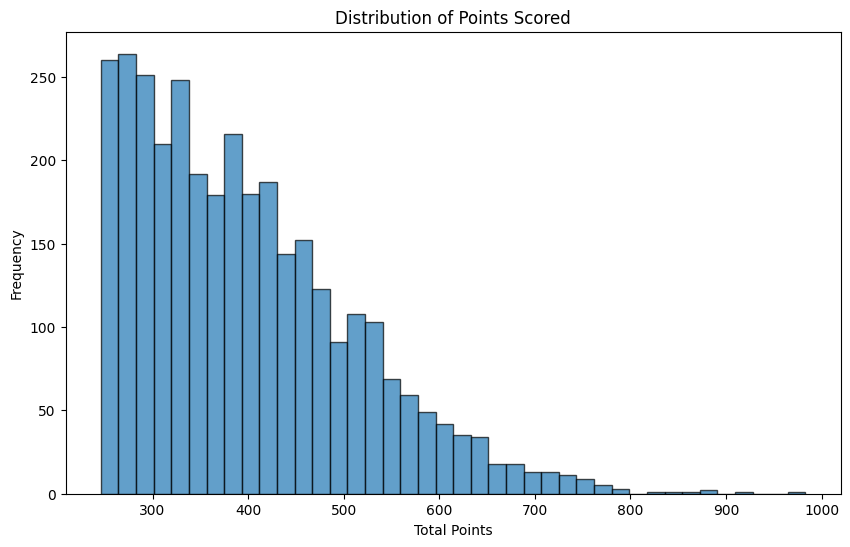

In [47]:
# Distribution of total points
plt.figure(figsize=(10, 6))
plt.hist(ncaa['PTS'], bins=40, edgecolor='black', alpha=0.7)
plt.xlabel('Total Points')
plt.ylabel('Frequency')
plt.title('Distribution of Points Scored')
plt.show()

<Figure size 1000x600 with 0 Axes>

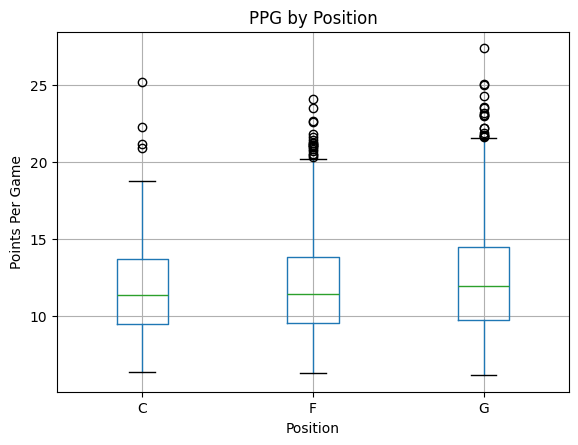

In [48]:
# Compare PPG by position
plt.figure(figsize=(10, 6))
ncaa.boxplot(column='PPG', by='POS')
plt.suptitle('')  # Remove default title
plt.xlabel('Position')
plt.ylabel('Points Per Game')
plt.title('PPG by Position')
plt.show()

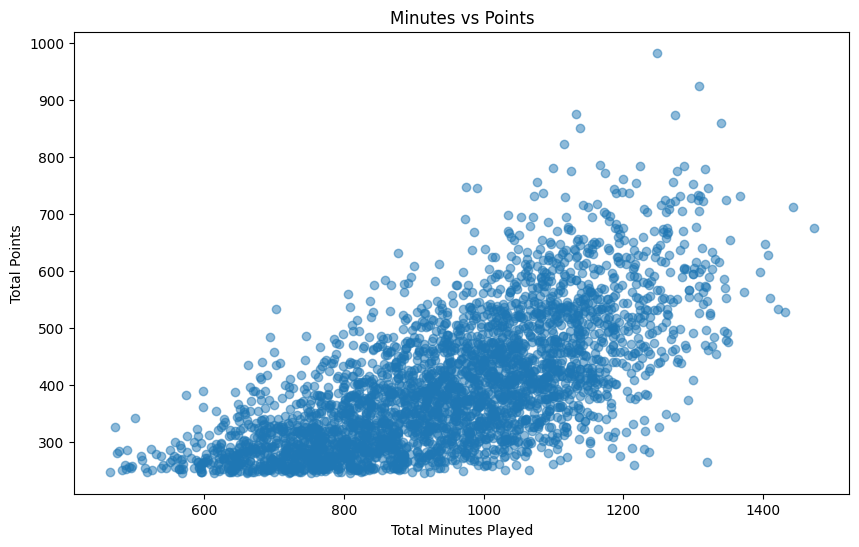

In [ ]:
# Do more minutes lead to more points?
plt.figure(figsize=(10, 6))
plt.scatter(ncaa['MP'], ncaa['PTS'], alpha=0.5)
plt.xlabel('Total Minutes Played')
plt.ylabel('Total Points')
plt.title('Minutes vs Points')
plt.show()
# More time = more opportunity to score but not necceasary

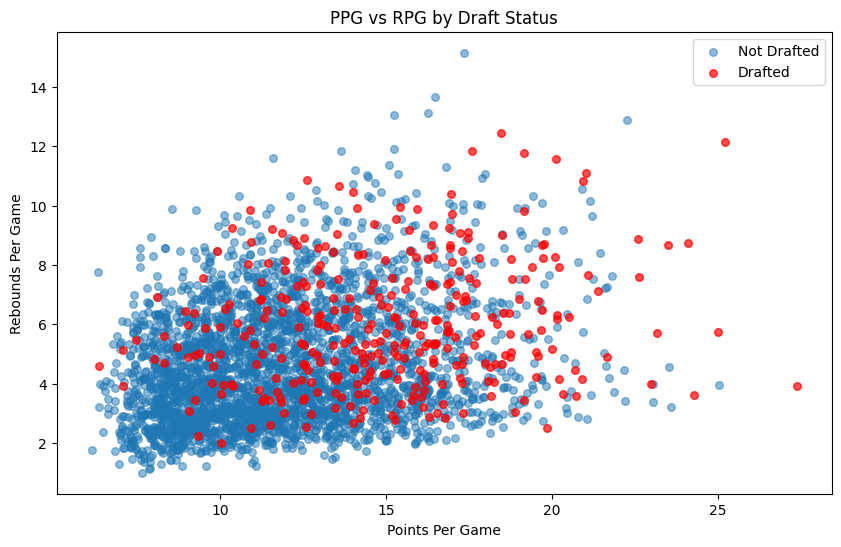

In [ ]:
# Color by draft status
drafted = ncaa[ncaa['Drafted'] == 1]
not_drafted = ncaa[ncaa['Drafted'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(not_drafted['PPG'], not_drafted['RPG'], alpha=0.5, label='Not Drafted', s=30)
plt.scatter(drafted['PPG'], drafted['RPG'], alpha=0.7, label='Drafted', s=30, color='red')
plt.xlabel('Points Per Game')
plt.ylabel('Rebounds Per Game')
plt.title('PPG vs RPG by Draft Status')
plt.legend()
plt.show()

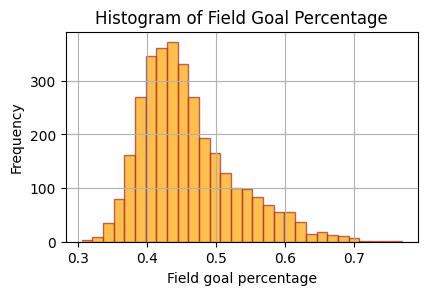

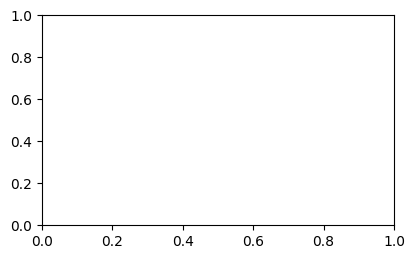

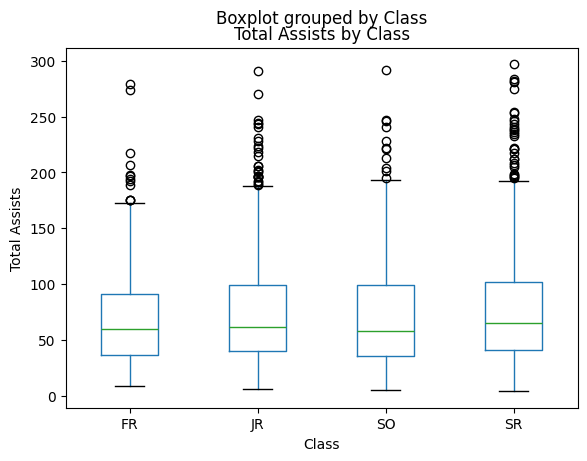

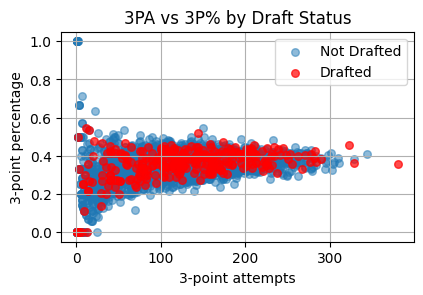

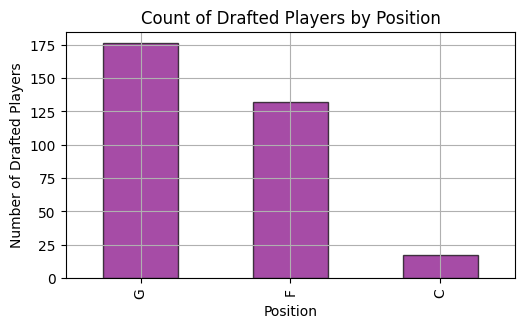

In [70]:
# Histogram of field goal percentage
plt.figure(figsize = (10, 6))
plt.subplot(2, 2, 1)
plt.hist(ncaa["FG%"], bins = 30, edgecolor = "brown", color = "orange", alpha = 0.7)  # fill -> color
plt.xlabel("Field goal percentage")
plt.ylabel("Frequency")
plt.title("Histogram of Field Goal Percentage")
plt.grid()

# Boxplot comparing total assists across different classes 
plt.figure(figsize = (10, 6))
plt.subplot(2, 2, 2)
ncaa.boxplot(column = "AST", by = "Class")
plt.xlabel("Class")
plt.ylabel("Total Assists")
plt.title("Total Assists by Class")
plt.grid()

# Scatter plot of 3-point attempts (3PA) vs 3-point percentage (3P%) - color by draft status
plt.figure(figsize = (10, 6))
plt.subplot(2, 2, 3)
drafted = ncaa[ncaa["Drafted"] == 1]
not_drafted = ncaa[ncaa["Drafted"] == 0]
plt.scatter(not_drafted["3PA"], not_drafted["3P%"], alpha = 0.5, label = "Not Drafted", s = 30)
plt.scatter(drafted["3PA"], drafted["3P%"], alpha = 0.7, label = "Drafted", s = 30, color = "red")
plt.xlabel("3-point attempts")
plt.ylabel("3-point percentage")
plt.title("3PA vs 3P% by Draft Status")
plt.legend()
plt.grid()

# Bar chart showing the count of drafted players by position
plt.figure(figsize = (10, 6))
plt.subplot(2, 2, 4)
drafted_counts = ncaa[ncaa["Drafted"] == 1]["POS"].value_counts()
drafted_counts.plot(kind = "bar", color = "purple", edgecolor = "black", alpha = 0.7)
plt.xlabel("Position")
plt.ylabel("Number of Drafted Players")
plt.title("Count of Drafted Players by Position")
plt.grid()  

plt.tight_layout()
plt.show()